In [31]:
%matplotlib inline
import numpy
import math
import matplotlib.pyplot as plt

In [32]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [33]:
def u_initial(nx):    
    u=numpy.zeros(nx)
    
    u[0:2/4*nx]=1    
    return u

In [34]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

In [35]:
u = u_initial(nx).copy()
x = numpy.linspace(0,4,nx)

/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [36]:
print(u)
print(x)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.  ]


(0, 1.5)

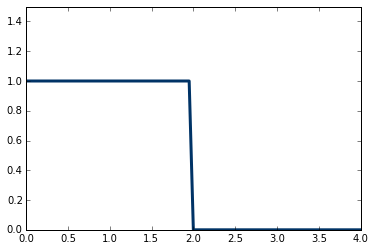

In [37]:
plt.plot(x, u, color='#003366', ls='-', lw=3)
plt.ylim(0,1.5)

In [38]:
a=1.4
import math
b=math.floor(a)
print(b)

1


In [39]:
print("Task 2")

Task 2


In [40]:
computeF = lambda u: (u/2)**2

[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.  ]


(0, 1)

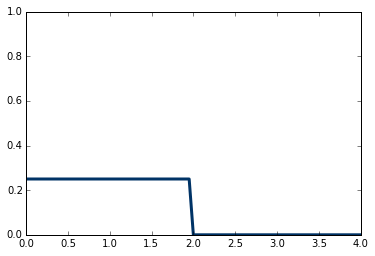

In [41]:
print(computeF(u))
plt.plot(x, computeF(u), color='#003366', ls='-', lw=3)
plt.ylim(0,1)

In [42]:
print("Task 3")

Task 3


In [43]:
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for i in range(1,nt):
        F = computeF(u)        
        ustar[:-1] =u[:-1]-dt/dx*(F[1:]-F[:-1]) 
       
        
        Fstar = computeF(ustar)
        
        un[i,1:] = 0.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[:-1]))
        
        u = un[i].copy()
        
    return un

In [44]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



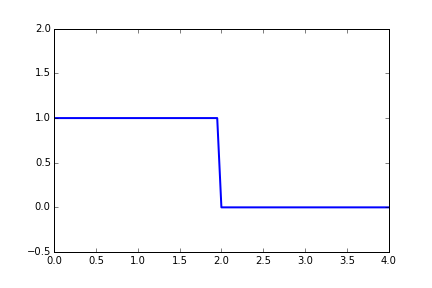
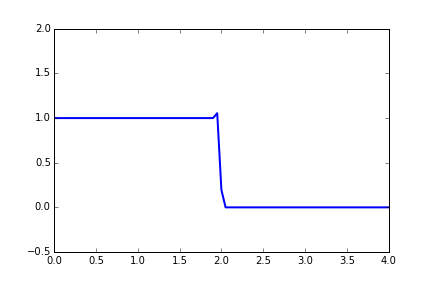
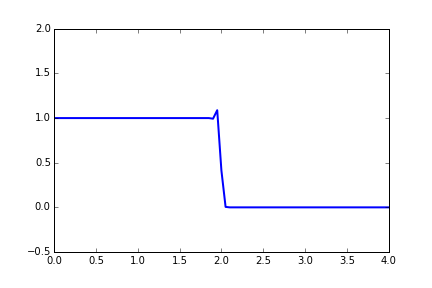
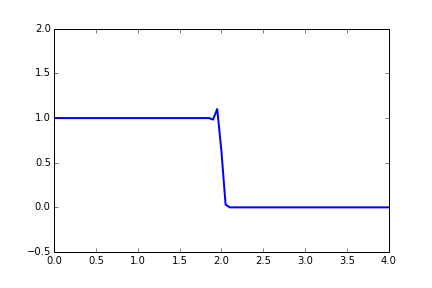
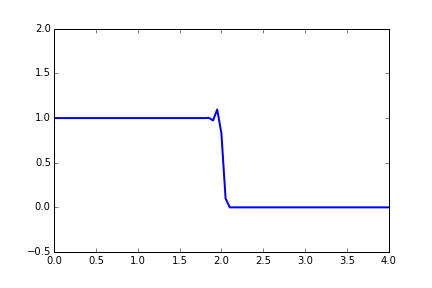
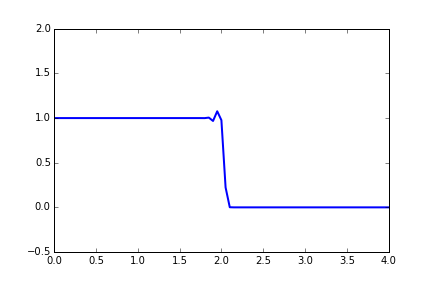
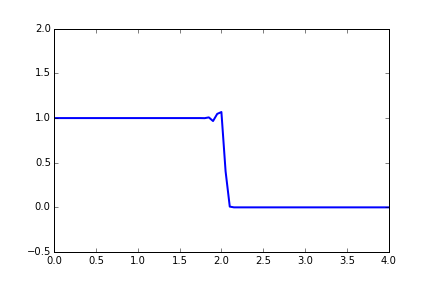
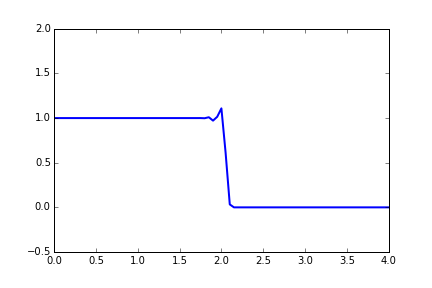
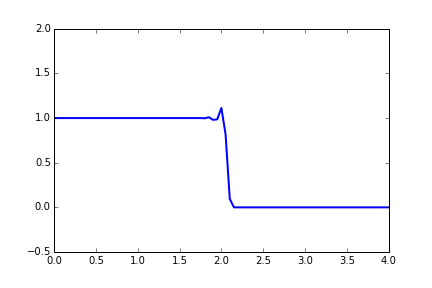
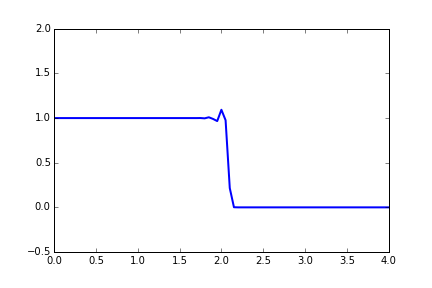
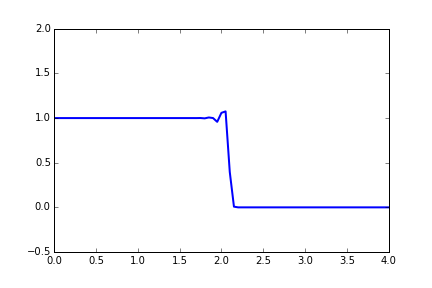
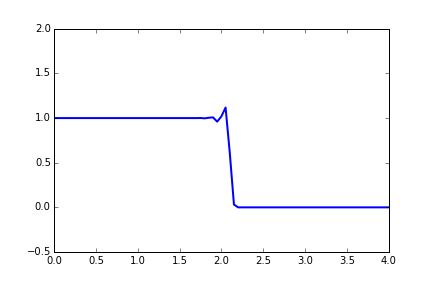
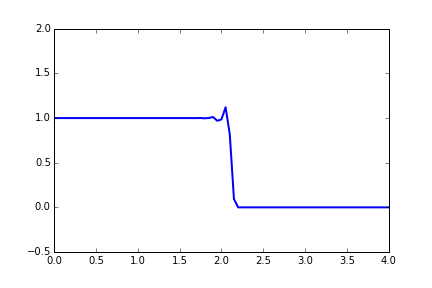
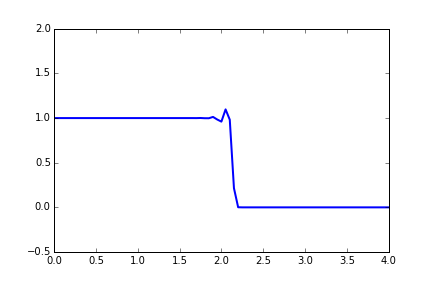
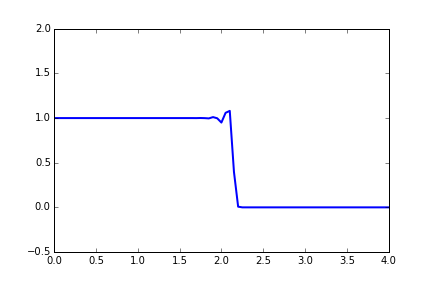
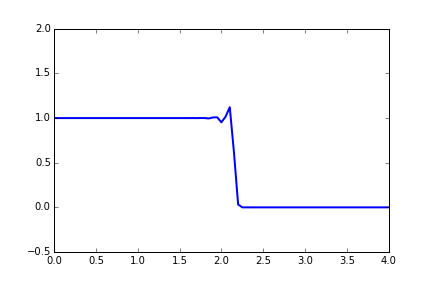
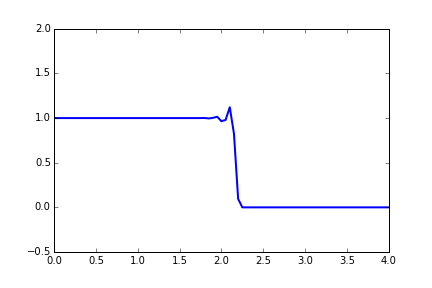
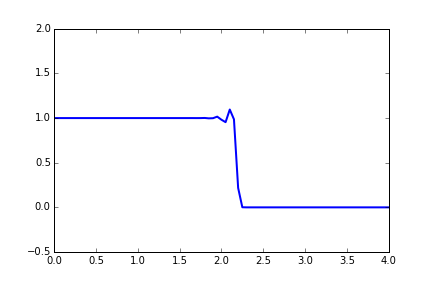
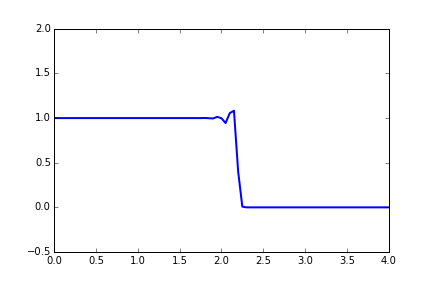
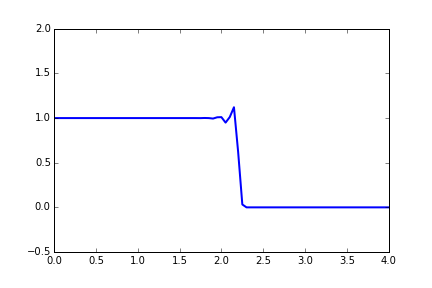
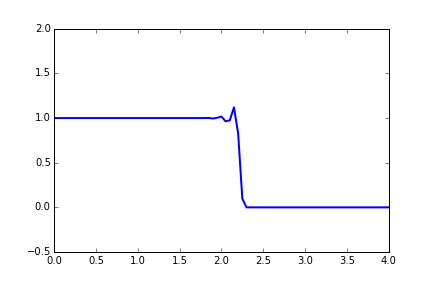
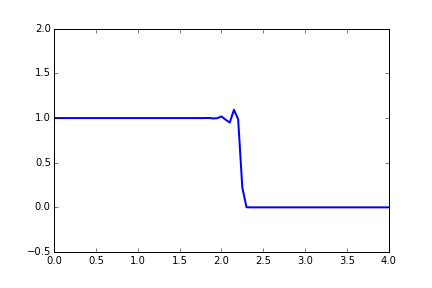
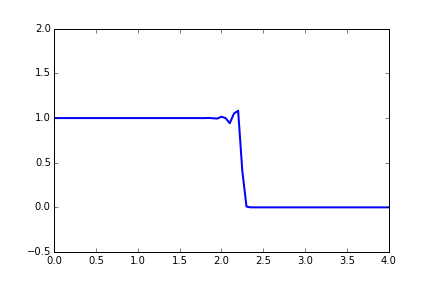
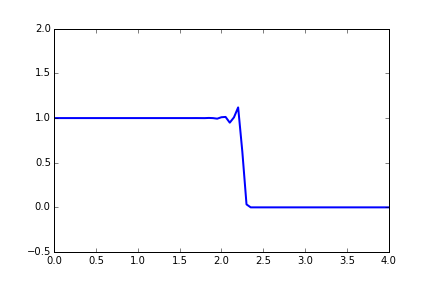
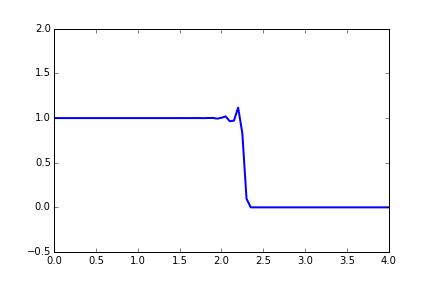
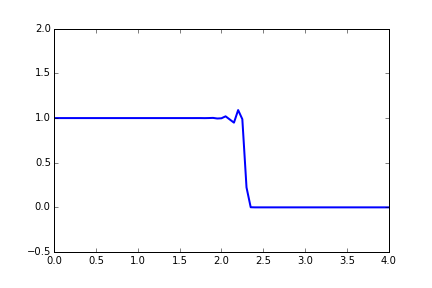
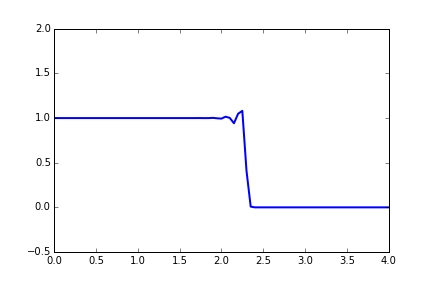
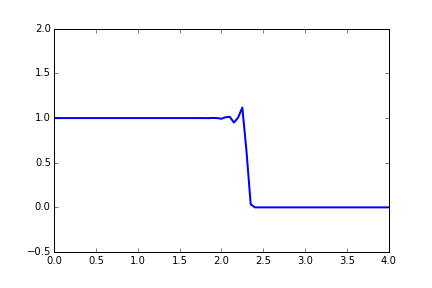
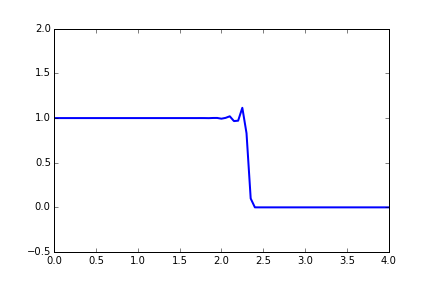
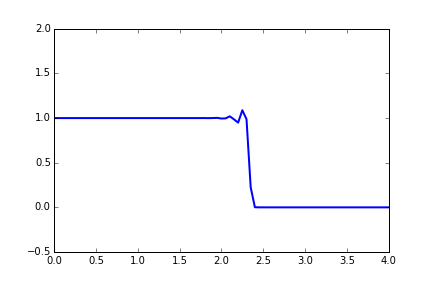
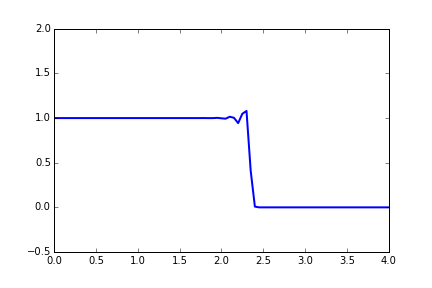
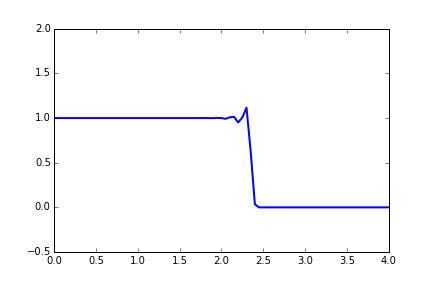
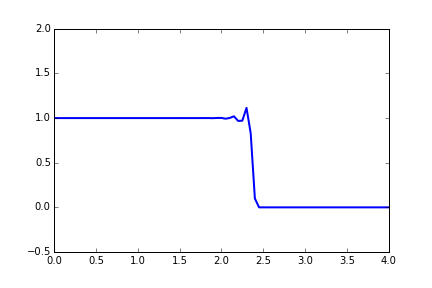
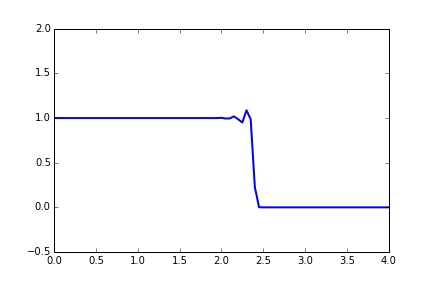
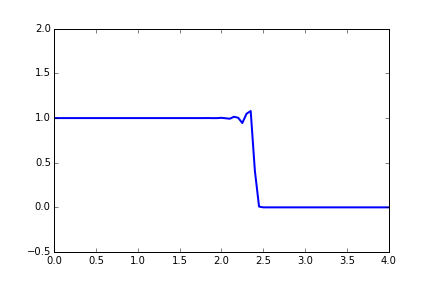
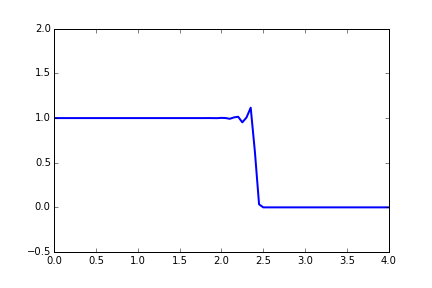
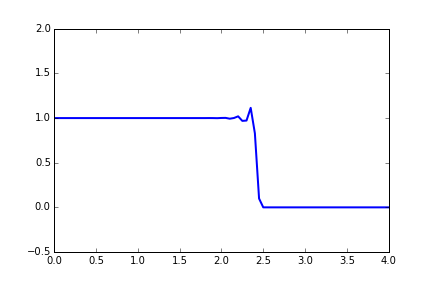
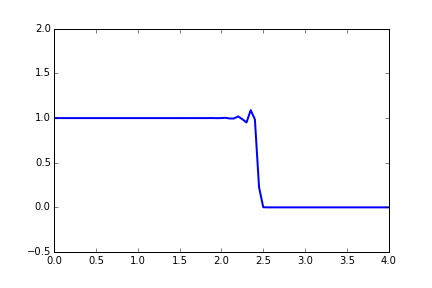
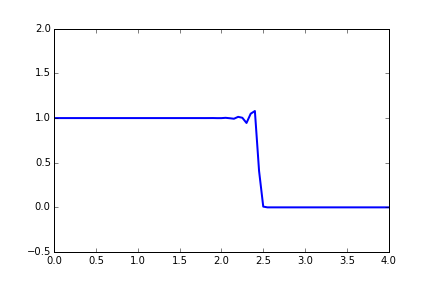
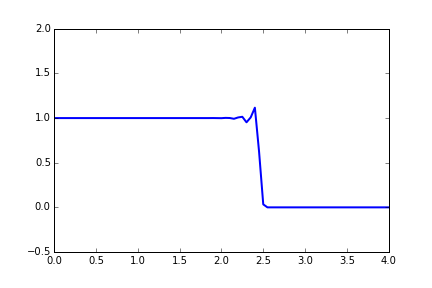
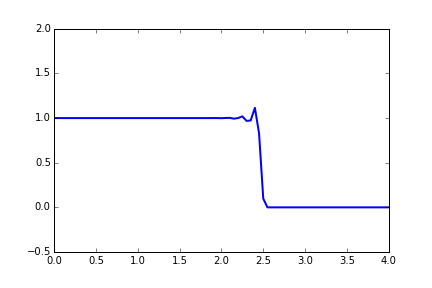
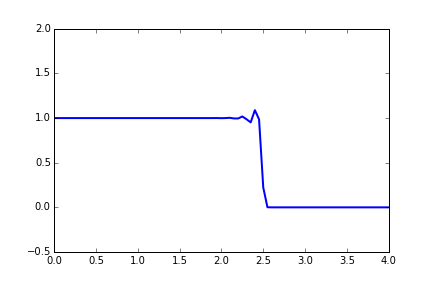
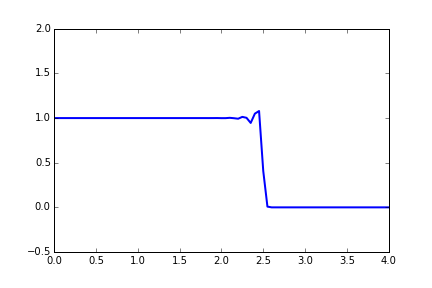
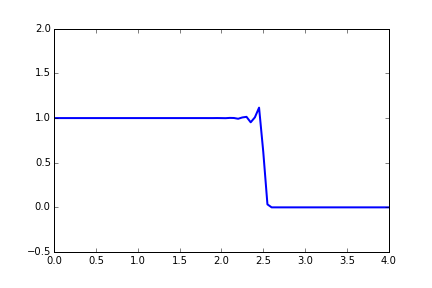
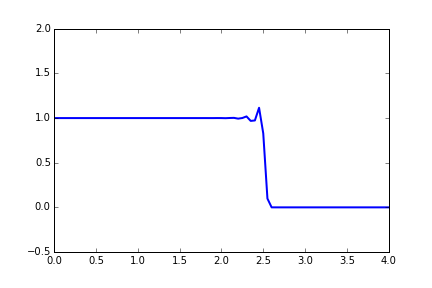
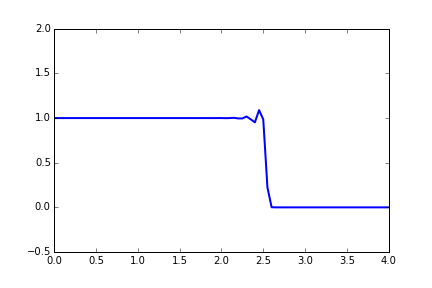
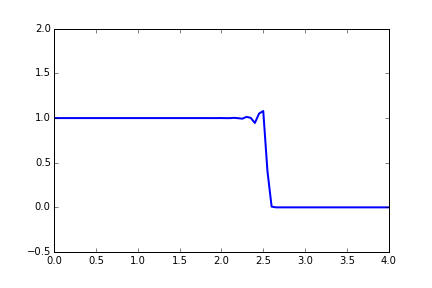
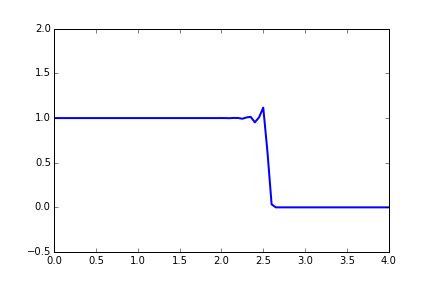
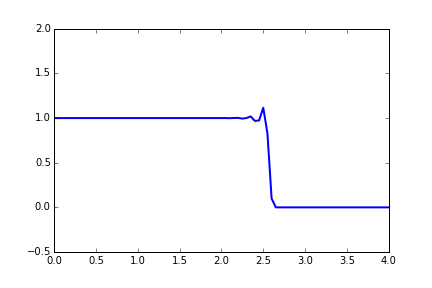
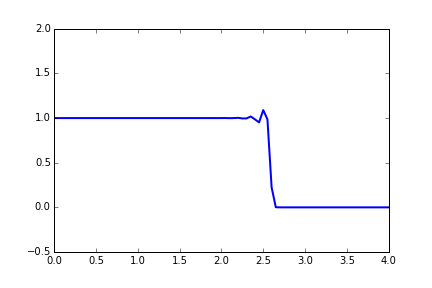
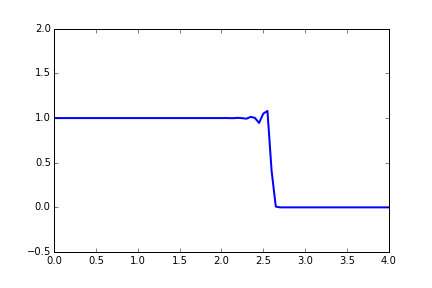
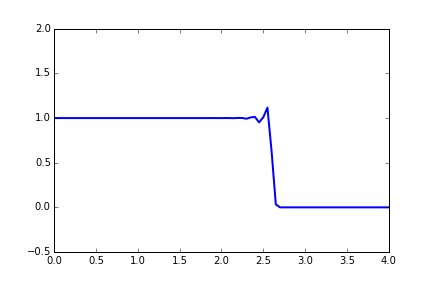
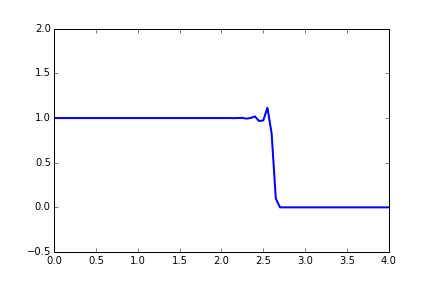
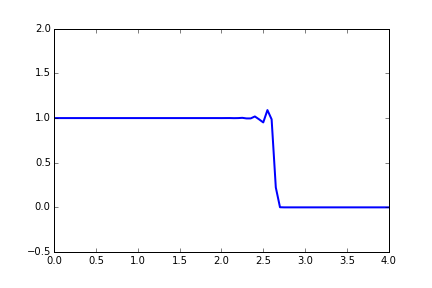
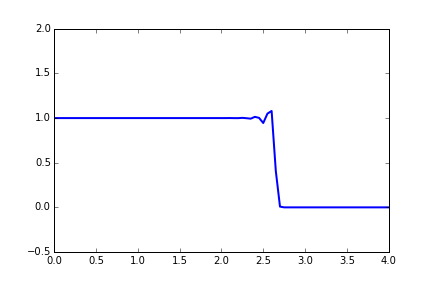
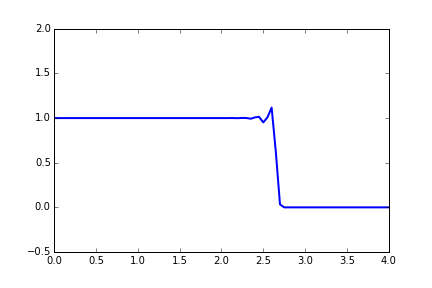
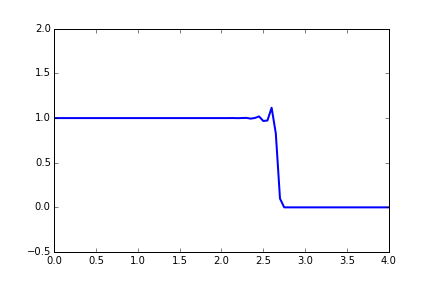
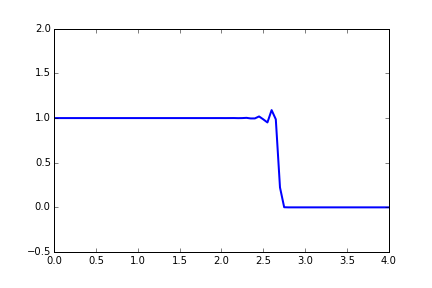
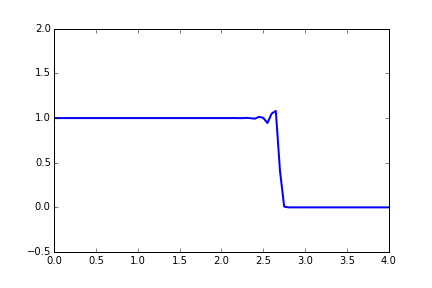
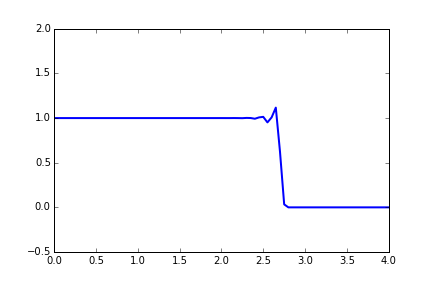
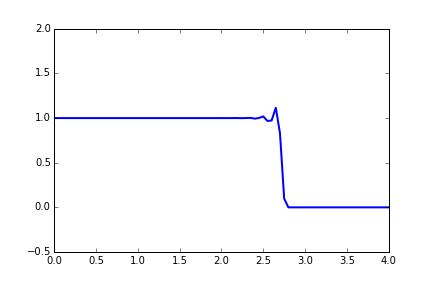
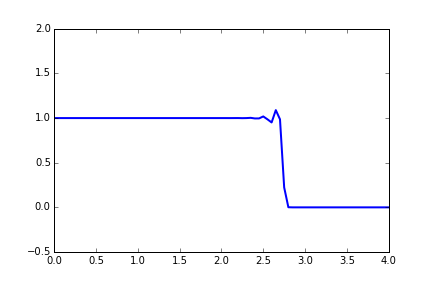
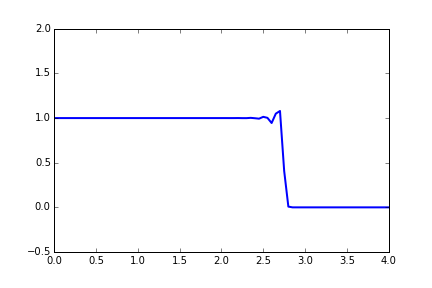
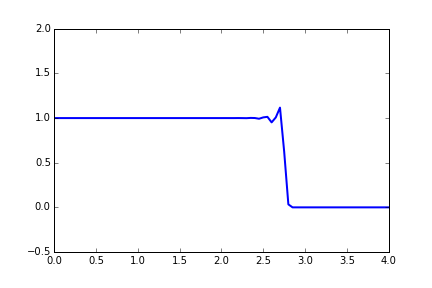
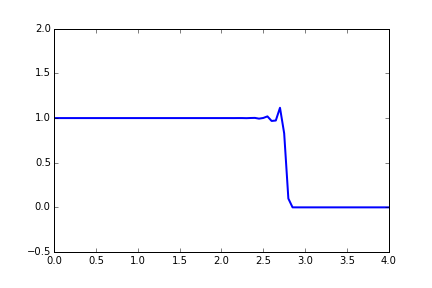
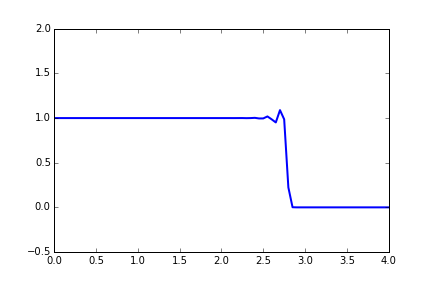
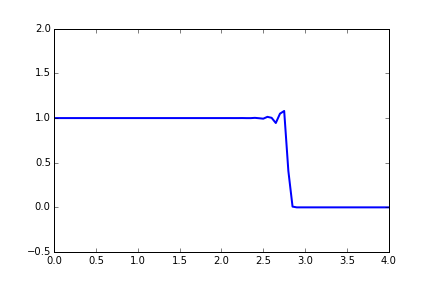
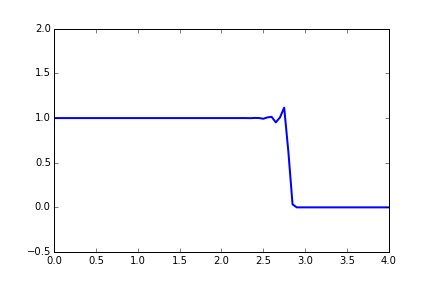
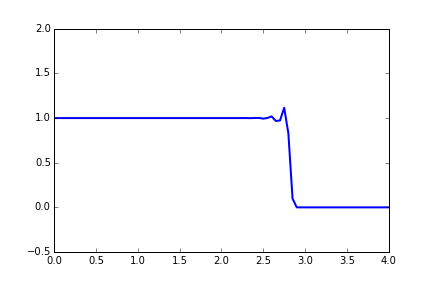
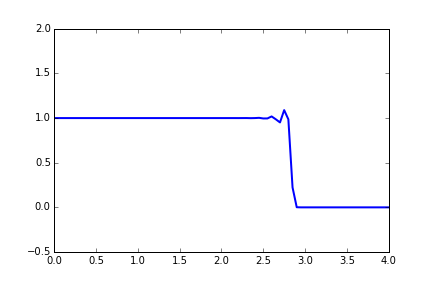

In [45]:
u = u_initial(nx).copy()
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

In [46]:
a=[1,2,3,4,5,6]

In [49]:
print(a[1:])

[2, 3, 4, 5, 6]


In [55]:
print(a[:-1])
print(a[1:-1])

[1, 2, 3, 4, 5]
[2, 3, 4, 5]


In [51]:
print("Task 4")

Task 4


In [65]:
def Dampingmaccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for i in range(1,nt):
        F = computeF(u)        
        ustar[1:-1] =u[1:-1]-dt/dx*(F[2:]-F[1:-1]) +0.9*(u[2: ]-2*u[1:-1]+u[:-2])
       
        
        Fstar = computeF(ustar)
        
        un[i,1:] = 0.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[:-1]))
        
        u = un[i].copy()
        
    return un

In [66]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



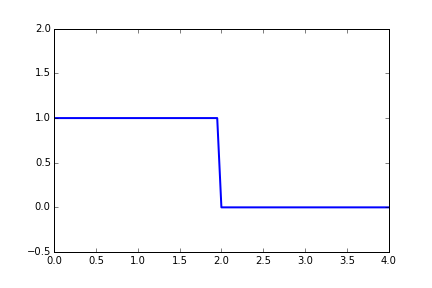
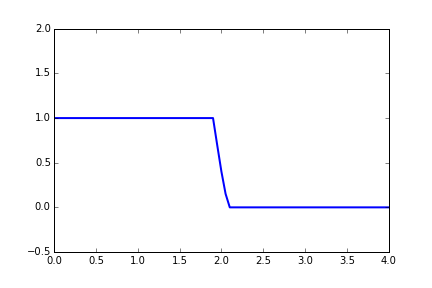
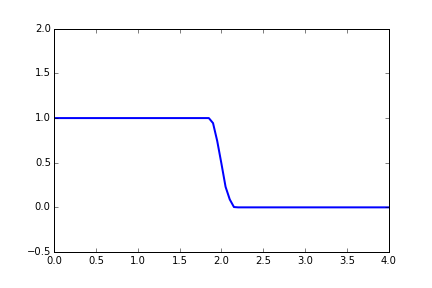
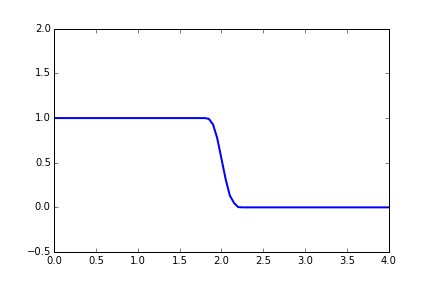
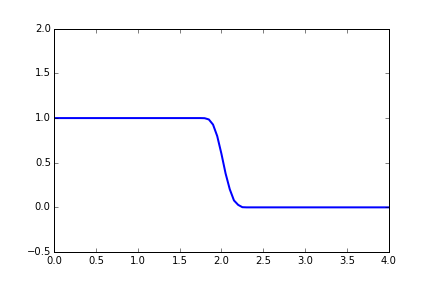
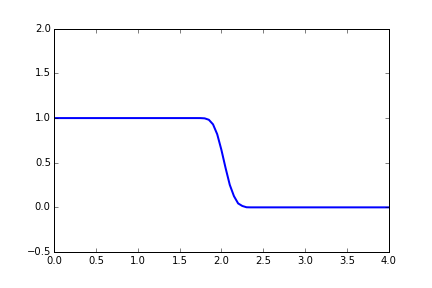
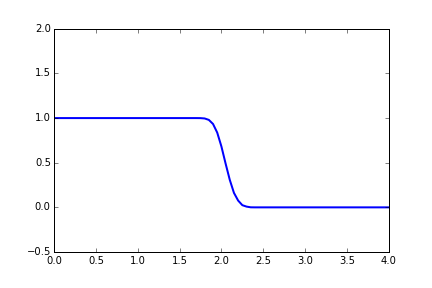
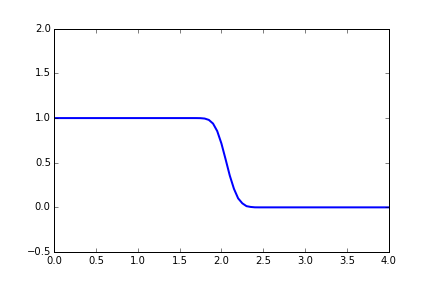
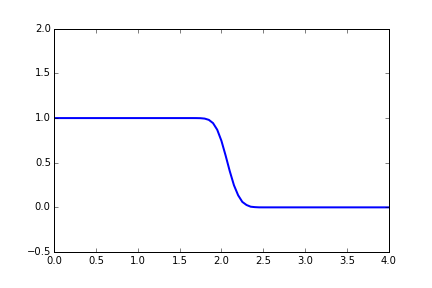
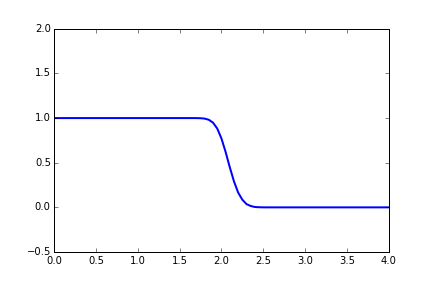
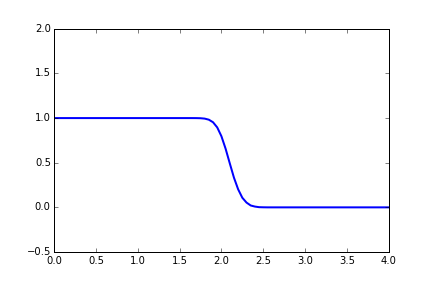
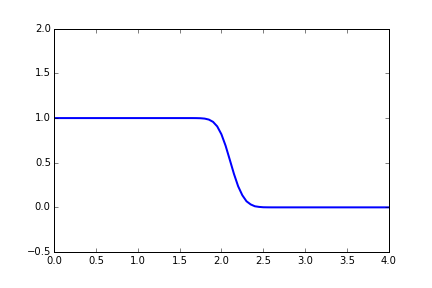
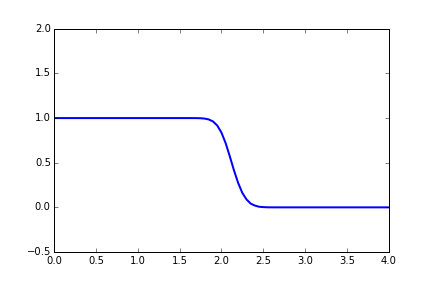
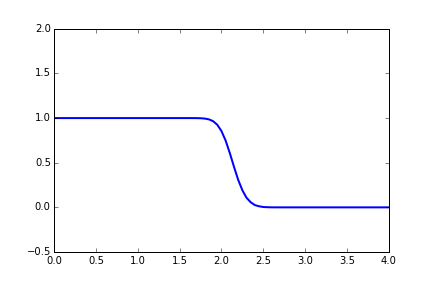
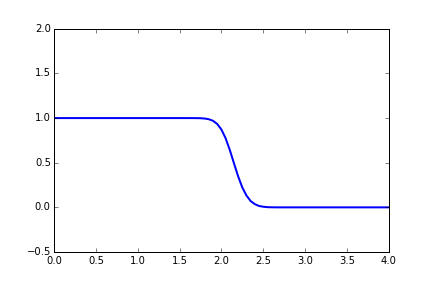
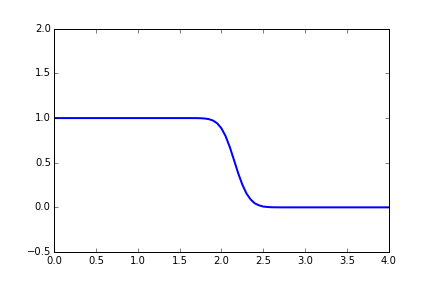
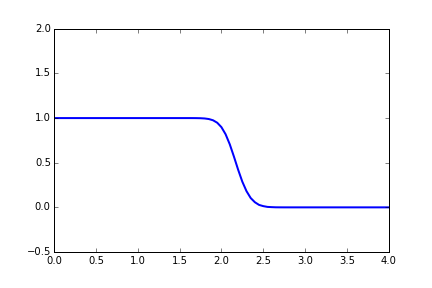
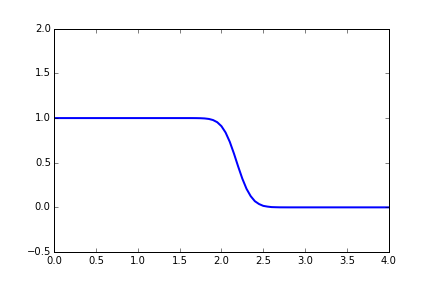
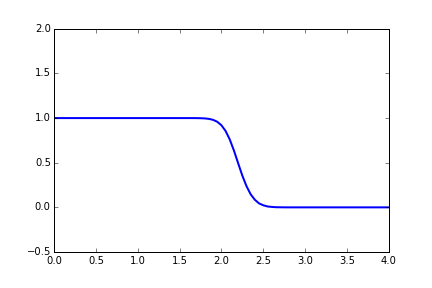
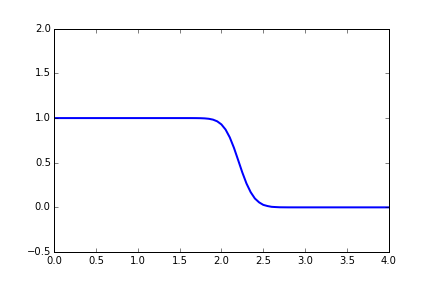
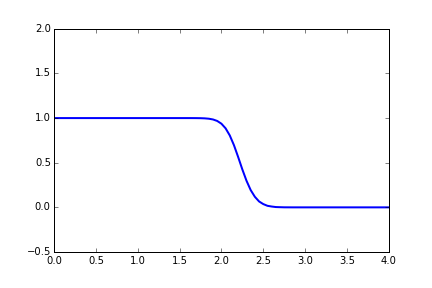
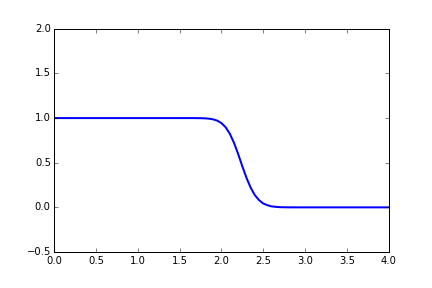
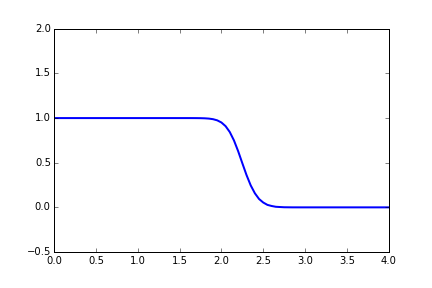
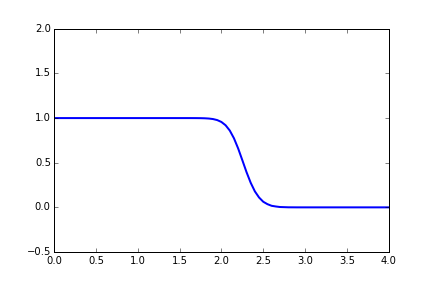
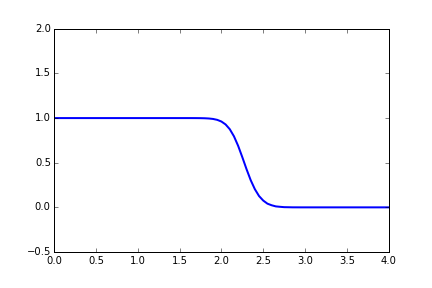
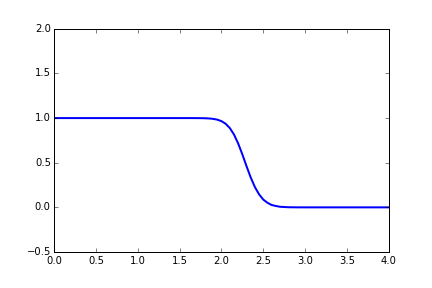
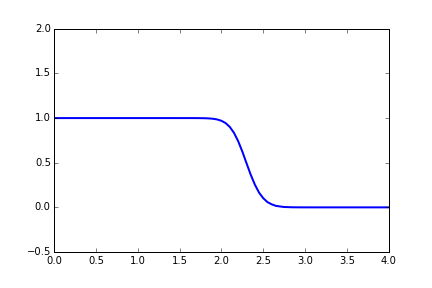
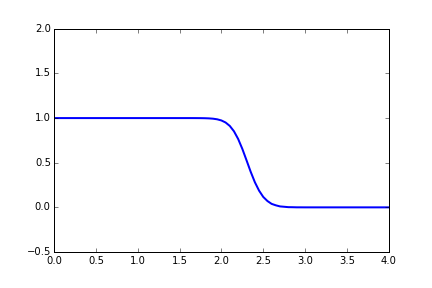
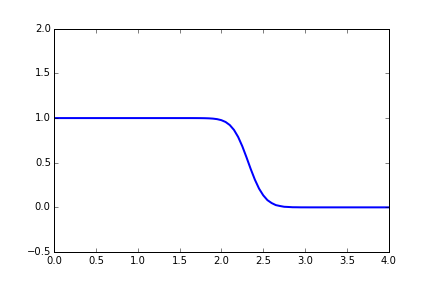
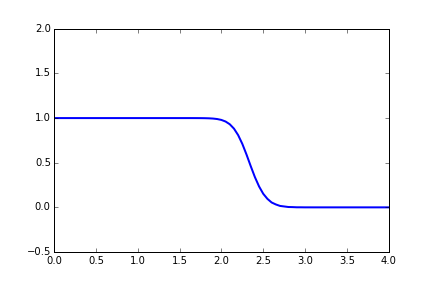
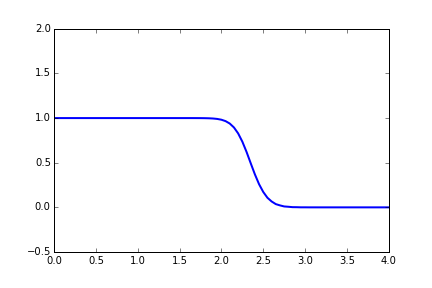
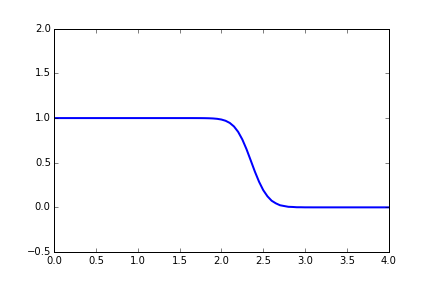
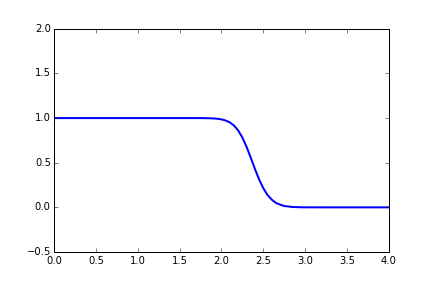
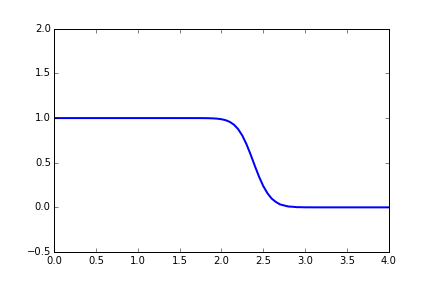
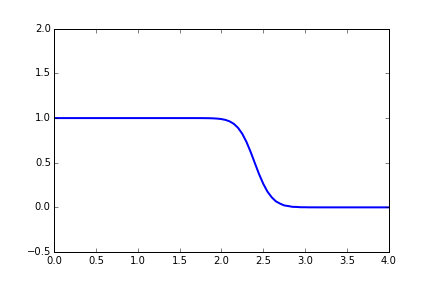
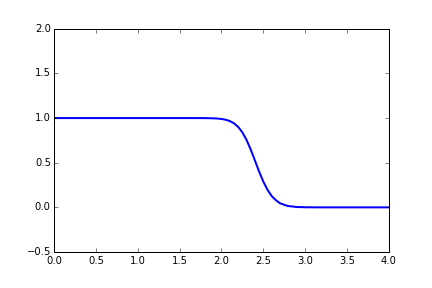
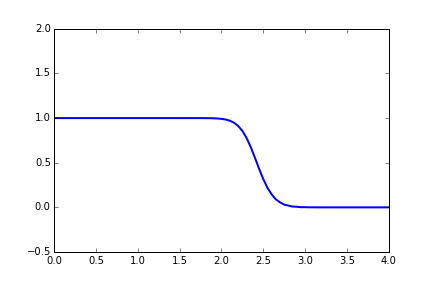
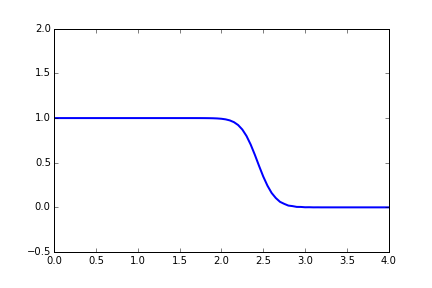
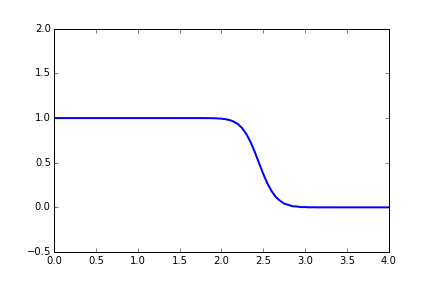
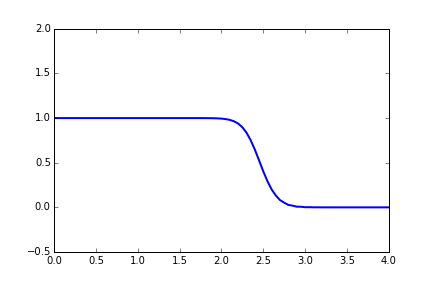
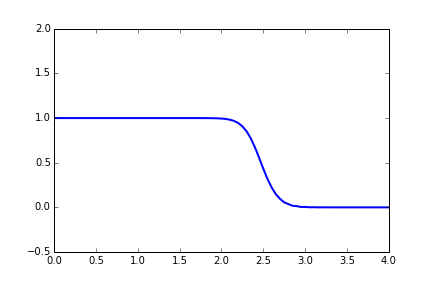
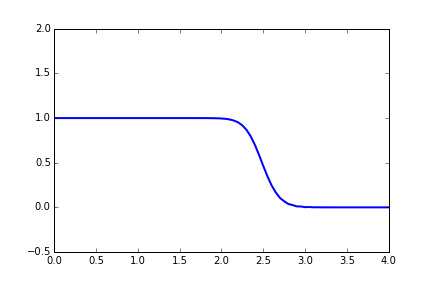
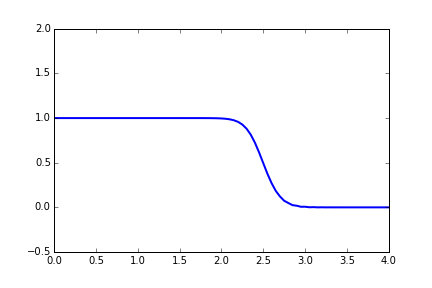
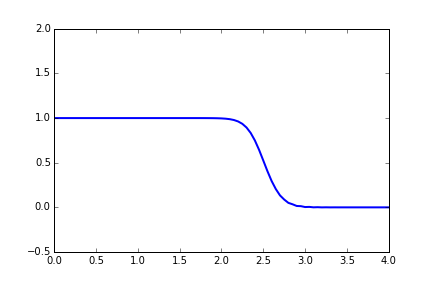
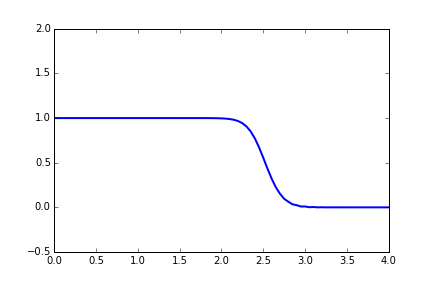
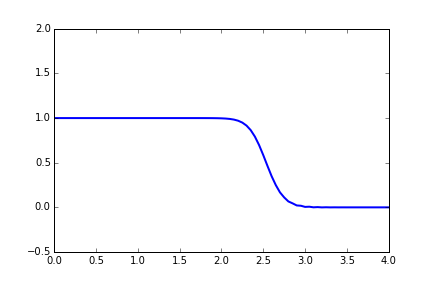
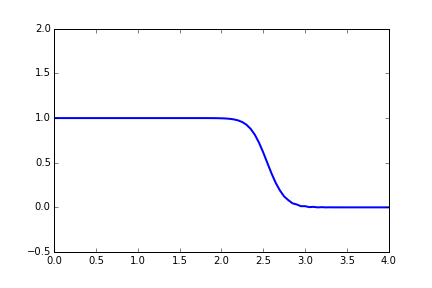
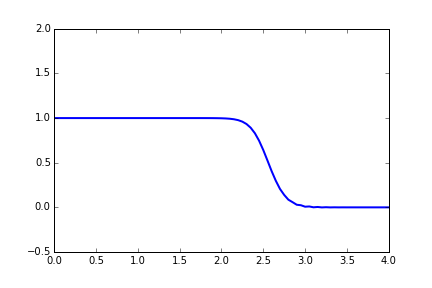
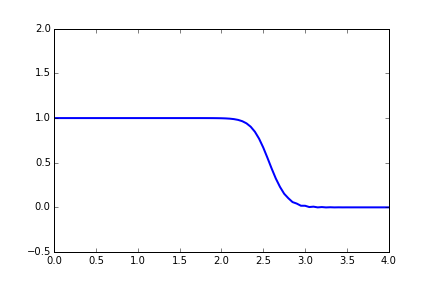
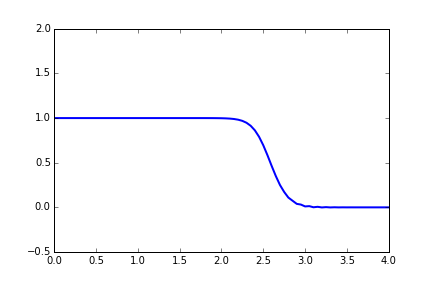
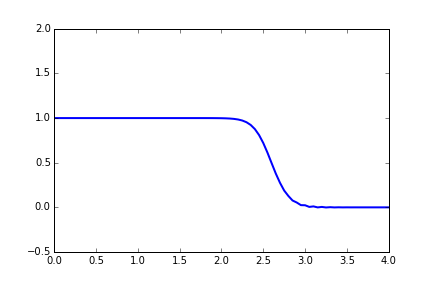
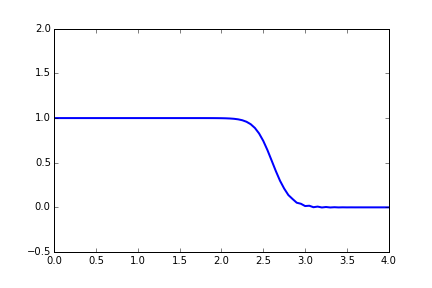
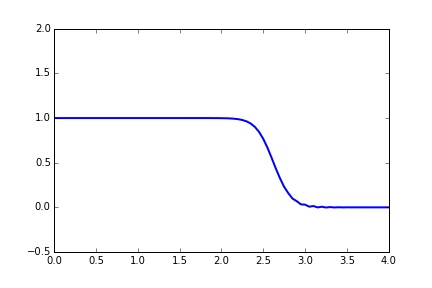
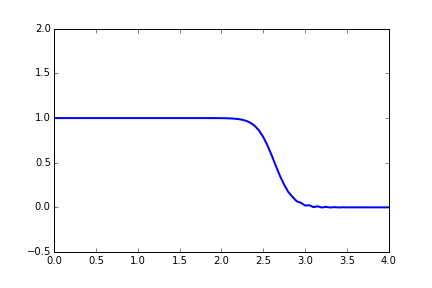
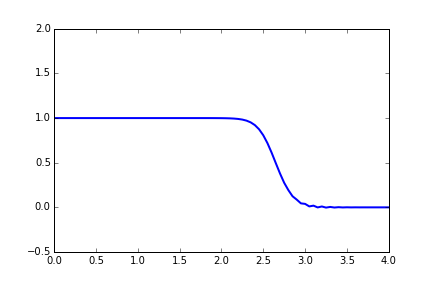
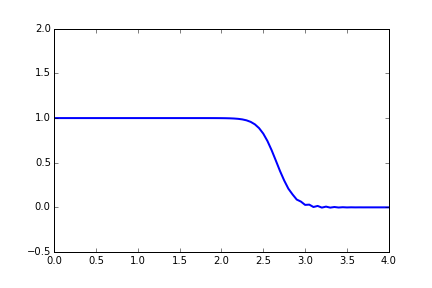
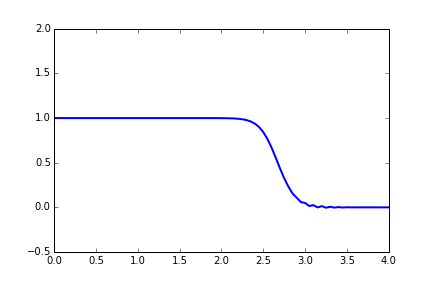
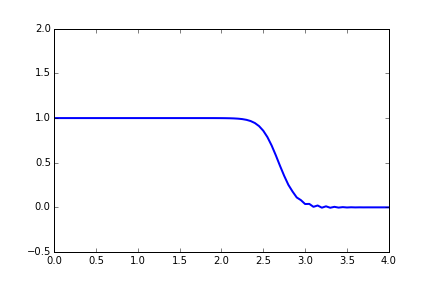
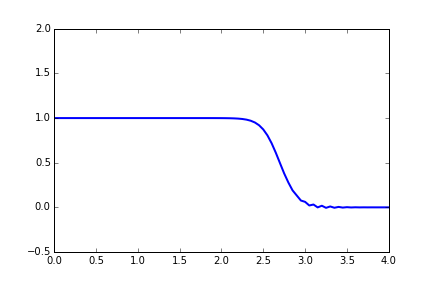
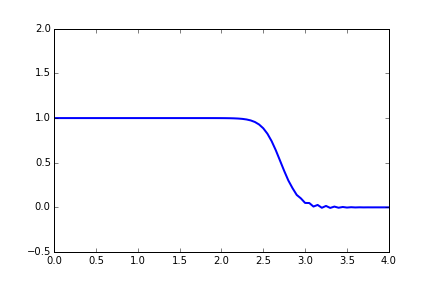
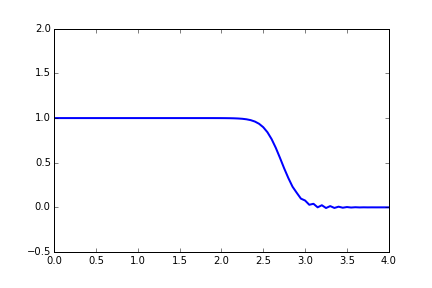
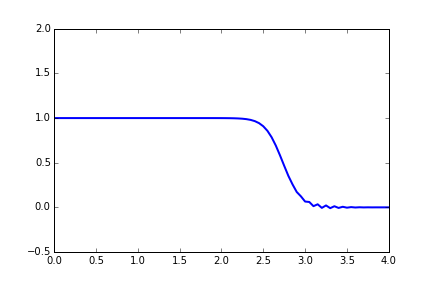
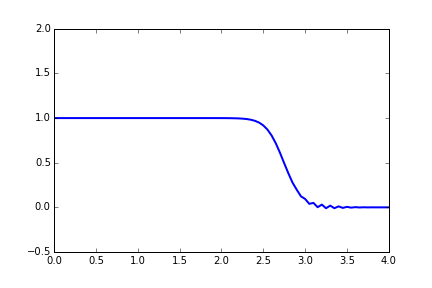
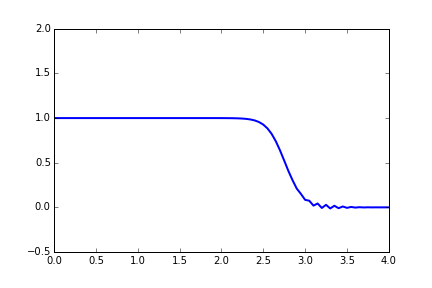
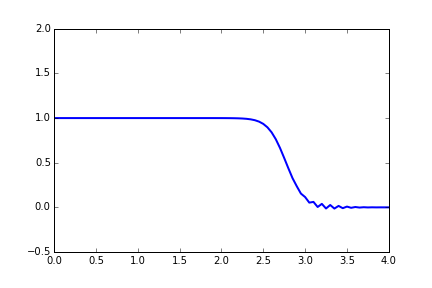
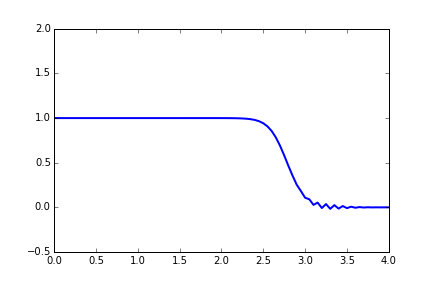
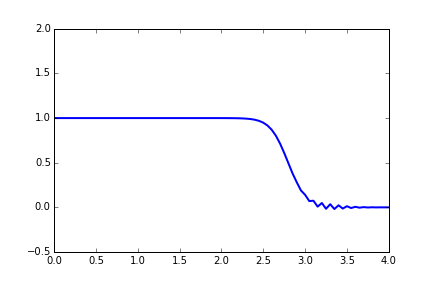
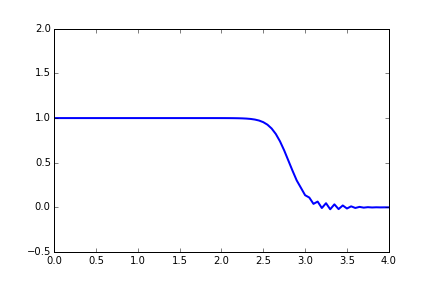
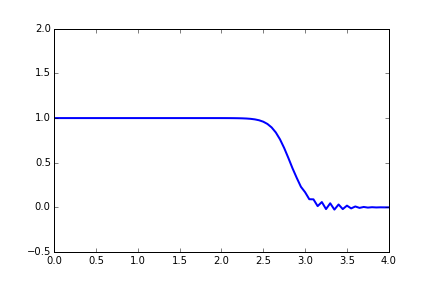
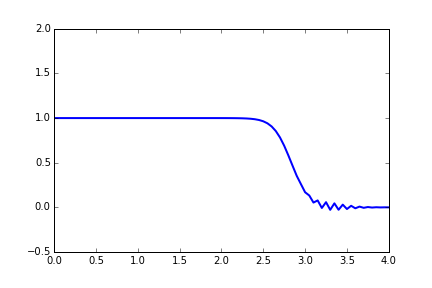

In [67]:
u = u_initial(nx).copy()
sigma = 1
dt = sigma*dx

Dampningun = Dampingmaccormack(u,nt,dt,dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=Dampningun, interval=50)
display_animation(anim, default_mode='once')